In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import svm
from sklearn import datasets

from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("C:\\Users\\Samruddhi Pasari\\Documents\\DSMT Material\\Project\\final\\final_data_6105.csv")

In [21]:
df.head()

,acct_age,favourites_count,followers_count,following,friends_count,id,in_reply_to_user_id,num_hashtags,num_mentions,num_urls,retweet_count,statuses_count,user_type,verified
0,0.690280,0.325147,0.002278,0.0,0.039731,191839658,0.145937,0.023177,0.305854,0.097820,0.104106,0.608592,1,0.0
1,0.426396,0.008454,0.000650,0.0,0.043174,2157382005,0.220953,0.036912,0.462550,0.115661,0.002666,0.038725,1,0.0
2,0.431029,0.102509,0.001056,0.0,0.081001,1947320929,0.040046,0.060868,0.383332,0.087200,0.527673,0.041007,1,0.0
3,0.438640,0.007586,0.000341,0.0,0.010368,1733095801,0.036730,0.103199,0.198605,0.176801,0.000979,0.014555,1,0.0
4,0.822222,0.000016,0.001974,0.0,0.084889,21959183,0.044361,0.082895,0.218627,0.207693,0.002465,0.031046,1,0.0


In [4]:
# Removing some unrequired features.

del df['Unnamed: 0']
del df['lang']
del df['name']

df.head(10)

,acct_age,favourites_count,followers_count,following,friends_count,id,in_reply_to_user_id,num_hashtags,num_mentions,num_urls,retweet_count,statuses_count,user_type,verified
0,0.690280,0.325147,0.002278,NaN,0.039731,191839658,0.145937,0.023177,0.305854,0.097820,0.104106,0.608592,1,0.0
1,0.426396,0.008454,0.000650,NaN,0.043174,2157382005,0.220953,0.036912,0.462550,0.115661,0.002666,0.038725,1,0.0
2,0.431029,0.102509,0.001056,NaN,0.081001,1947320929,0.040046,0.060868,0.383332,0.087200,0.527673,0.041007,1,0.0
3,0.438640,0.007586,0.000341,NaN,0.010368,1733095801,0.036730,0.103199,0.198605,0.176801,0.000979,0.014555,1,0.0
4,0.822222,0.000016,0.001974,NaN,0.084889,21959183,0.044361,0.082895,0.218627,0.207693,0.002465,0.031046,1,0.0
5,0.407186,0.021724,0.000559,NaN,0.031874,2291421004,0.323567,0.033995,0.348548,0.076752,0.040765,0.014315,1,0.0
6,0.401942,0.004659,0.000226,NaN,0.006723,2337494094,0.054882,0.115528,0.054468,0.000000,0.000110,0.000108,1,0.0
7,0.670674,0.039382,0.000307,NaN,0.013163,225241810,0.067338,0.014861,0.172991,0.076559,0.039836,0.028222,1,0.0
8,0.548430,0.003645,0.000441,NaN,0.012960,585912212,0.124632,0.014644,0.363571,0.147591,0.030219,0.072452,1,0.0
9,0.404430,0.000733,0.000184,NaN,0.004739,2320414572,0.157679,0.010003,0.150920,0.032359,0.007667,0.003607,1,0.0


In [5]:
# Remove NaN from the dataset
df = df.fillna(0)
df.head()

,acct_age,favourites_count,followers_count,following,friends_count,id,in_reply_to_user_id,num_hashtags,num_mentions,num_urls,retweet_count,statuses_count,user_type,verified
0,0.690280,0.325147,0.002278,0.0,0.039731,191839658,0.145937,0.023177,0.305854,0.097820,0.104106,0.608592,1,0.0
1,0.426396,0.008454,0.000650,0.0,0.043174,2157382005,0.220953,0.036912,0.462550,0.115661,0.002666,0.038725,1,0.0
2,0.431029,0.102509,0.001056,0.0,0.081001,1947320929,0.040046,0.060868,0.383332,0.087200,0.527673,0.041007,1,0.0
3,0.438640,0.007586,0.000341,0.0,0.010368,1733095801,0.036730,0.103199,0.198605,0.176801,0.000979,0.014555,1,0.0
4,0.822222,0.000016,0.001974,0.0,0.084889,21959183,0.044361,0.082895,0.218627,0.207693,0.002465,0.031046,1,0.0


In [6]:
# Create X
X = df.loc[:, df.columns != 'user_type']
print(X)

      acct_age  favourites_count  followers_count  following  friends_count  \
0     0.690280          0.325147         0.002278        0.0       0.039731   
1     0.426396          0.008454         0.000650        0.0       0.043174   
2     0.431029          0.102509         0.001056        0.0       0.081001   
3     0.438640          0.007586         0.000341        0.0       0.010368   
4     0.822222          0.000016         0.001974        0.0       0.084889   
...        ...               ...              ...        ...            ...   
2094  0.766914          0.000000         0.002254        0.0       0.011042   
2095  0.766832          0.000000         0.012386        0.0       0.014346   
2096  0.766804          0.000000         0.115686        0.0       0.136709   
2097  0.766803          0.000000         0.087545        0.0       0.113059   
2098  0.764207          0.000000         0.012014        0.0       0.038865   

              id  in_reply_to_user_id  num_hashtags

In [7]:
# Create Y
y = df.user_type.values.reshape(2099,1);

In [8]:
print(y)

[[1]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]


In [8]:
# Scale the data to seperate datapoints better so that SVM can find a seperation

from sklearn.preprocessing import MinMaxScaler

scaling = MinMaxScaler(feature_range=(-1,1)).fit(X)
X_scale = scaling.transform(X)

In [9]:
# Using the Train-Test Split Strategy
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.3, random_state=0)

# Generate Models
linear = svm.SVC(kernel='linear', gamma='auto', C=256)
rbf = svm.SVC(kernel='rbf', gamma='auto', C=256)
polynomial = svm.SVC(kernel='poly', degree=3, gamma='auto', C=256)

# Fit the data into the models
lsvc = linear.fit(X_train, y_train.ravel())
rsvc = rbf.fit(X_train, y_train.ravel())
psvc = polynomial.fit(X_train, y_train.ravel())

In [10]:
#Accuracy of predicting by linear
lsvc_pre = lsvc.predict(X_train)
lsvc_accuracy = sum(lsvc_pre==y_train.ravel())/len(y_train.ravel())

#Accuracy of predicting by RBF
rsvc_pre = rsvc.predict(X_train)
rsvc_accuracy = sum(rsvc_pre==y_train.ravel())/len(y_train.ravel())

#Accuracy of predicting by polynomial with degree=3
psvc_pre = psvc.predict(X_train)
psvc_accuracy = sum(psvc_pre==y_train.ravel())/len(y_train.ravel())

print("Accuracy of predicting by linear: ", lsvc_accuracy)
print("Accuracy of predicting by RBF: ", rsvc_accuracy)
print("Accuracy of predicting by polynomial with degree=3: ", psvc_accuracy)

Accuracy of predicting by linear:  0.9788972089857045
Accuracy of predicting by RBF:  0.9952348536419333
Accuracy of predicting by polynomial with degree=3:  0.9945541184479237


In [11]:
#Accuracy of predicting by linear
lsvc_pre = lsvc.predict(X_test)
lsvc_accuracy = sum(lsvc_pre==y_test.ravel())/len(y_test.ravel())

#Accuracy of predicting by RBF
rsvc_pre = rsvc.predict(X_test)
rsvc_accuracy = sum(rsvc_pre==y_test.ravel())/len(y_test.ravel())

#Accuracy of predicting by polynomial with degree=3
psvc_pre = psvc.predict(X_test)
psvc_accuracy = sum(psvc_pre==y_test.ravel())/len(y_test.ravel())

print("Accuracy of predicting by linear: ", lsvc_accuracy)
print("Accuracy of predicting by RBF: ", rsvc_accuracy)
print("Accuracy of predicting by polynomial with degree=3: ", psvc_accuracy)

Accuracy of predicting by linear:  0.9873015873015873
Accuracy of predicting by RBF:  0.9920634920634921
Accuracy of predicting by polynomial with degree=3:  0.9888888888888889


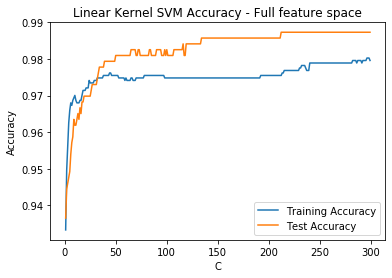

In [12]:
# Plotting Accuracy graph against hyperparameter C
# Note we get the best accuracy for C = 256

from sklearn import metrics

trainAcc = []
testAcc = []
C = []

for i in range (1, 300):
    clf = svm.SVC(C=i, kernel='linear', gamma = 'auto');
    clf.fit(X_train, y_train.ravel()); 
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    
    trainAcc.append(metrics.accuracy_score(y_train.ravel(), y_pred_train.ravel()))
    testAcc.append(metrics.accuracy_score(y_test.ravel(), y_pred_test.ravel()))
    C.append(i)
    
plt.plot(C, trainAcc, label = "Training Accuracy")
plt.plot(C, testAcc, label = "Test Accuracy")
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Linear Kernel SVM Accuracy - Full feature space')
plt.legend()
plt.show()

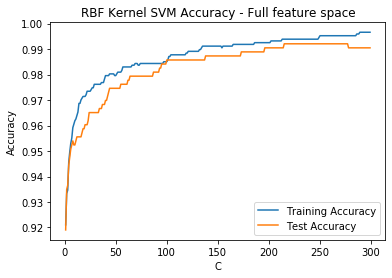

In [13]:
# Plotting Accuracy graph against hyperparameter C
# Note we get the best accuracy for C = 256

from sklearn import metrics

trainAcc = []
testAcc = []
C = []

for i in range (1, 300):
    clf = svm.SVC(C=i, kernel='rbf', gamma = 'auto');
    clf.fit(X_train, y_train.ravel()); 
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    
    trainAcc.append(metrics.accuracy_score(y_train.ravel(), y_pred_train.ravel()))
    testAcc.append(metrics.accuracy_score(y_test.ravel(), y_pred_test.ravel()))
    C.append(i)

plt.plot(C, trainAcc, label = "Training Accuracy")
plt.plot(C, testAcc, label = "Test Accuracy")
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('RBF Kernel SVM Accuracy - Full feature space')
plt.legend()
plt.show()

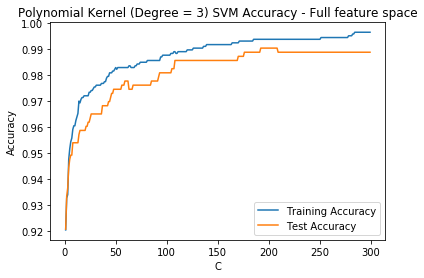

In [14]:
# Plotting Accuracy graph against hyperparameter C
# Note we get the best accuracy for C = 256

from sklearn import metrics

trainAcc = []
testAcc = []
C = []

for i in range (1, 300):
    clf = svm.SVC(C=i, kernel='poly', degree=3, gamma = 'auto');
    clf.fit(X_train, y_train.ravel()); 
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    
    trainAcc.append(metrics.accuracy_score(y_train.ravel(), y_pred_train.ravel()))
    testAcc.append(metrics.accuracy_score(y_test.ravel(), y_pred_test.ravel()))
    C.append(i)
    
plt.plot(C, trainAcc, label = "Training Accuracy")
plt.plot(C, testAcc, label = "Test Accuracy")
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Polynomial Kernel (Degree = 3) SVM Accuracy - Full feature space')
plt.legend()
plt.show()

In [28]:
# Perform PCA on the dataset to decrease the number of dimensions

# no of components = 3
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(X_scale)
X_pca = pca.transform(X_scale)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (2099, 13)
transformed shape: (2099, 3)


(2099,) (2099,) (2099,)


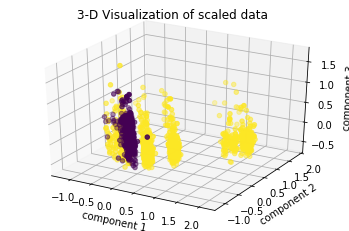

In [23]:
# PCA Plot of the datapoints for visualization purposes 

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X_ = X_pca[:, 0]
Y_ = X_pca[:, 1]
Z_ = X_pca[:, 2]

print(X_.shape, Y_.shape, Z_.shape)

ax.scatter(X_, Y_, Z_, c=y.ravel())

ax.set_xlabel('component 1')
ax.set_ylabel('component 2')
ax.set_zlabel('component 3')
ax.set_title('3-D Visualization of scaled data ')

plt.show()

In [29]:
# Using the Train-Test Split Strategy on the PCA Data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=0)

# Generating models for SVM on PCA data
linear = svm.SVC(kernel='linear', gamma='auto', C=256)
rbf = svm.SVC(kernel='rbf', gamma='auto', C=256)
polynomial = svm.SVC(kernel='poly', degree=3, gamma='auto', C=256)

# Training models
lsvc = linear.fit(X_train, y_train.ravel())
rsvc = rbf.fit(X_train, y_train.ravel())
psvc = polynomial.fit(X_train, y_train.ravel())

In [26]:
#Accuracy of predicting by linear
lsvc_pre = lsvc.predict(X_train)
lsvc_accuracy = sum(lsvc_pre==y_train.ravel())/len(y_train.ravel())

#Accuracy of predicting by RBF
rsvc_pre = rsvc.predict(X_train)
rsvc_accuracy = sum(rsvc_pre==y_train.ravel())/len(y_train.ravel())

#Accuracy of predicting by polynomial with degree=3
psvc_pre = psvc.predict(X_train)
psvc_accuracy = sum(psvc_pre==y_train.ravel())/len(y_train.ravel())

print("Accuraies determination after PCA on train data\n")
print("Accuracy of predicting by linear: ", lsvc_accuracy)
print("Accuracy of predicting by RBF: ", rsvc_accuracy)
print("Accuracy of predicting by polynomial with degree=3: ", psvc_accuracy)

Accuraies determination after PCA on train data

Accuracy of predicting by linear:  0.9026548672566371
Accuracy of predicting by RBF:  0.9686861810755616
Accuracy of predicting by polynomial with degree=3:  0.9074200136147039


In [27]:
#Accuracy of predicting by linear
lsvc_pre = lsvc.predict(X_test)
lsvc_accuracy = sum(lsvc_pre==y_test.ravel())/len(y_test.ravel())

#Accuracy of predicting by RBF
rsvc_pre = rsvc.predict(X_test)
rsvc_accuracy = sum(rsvc_pre==y_test.ravel())/len(y_test.ravel())

#Accuracy of predicting by polynomial with degree=3
psvc_pre = psvc.predict(X_test)
psvc_accuracy = sum(psvc_pre==y_test.ravel())/len(y_test.ravel())

print("Accuraies determination after PCA on test data\n")
print("Accuracy of predicting by linear: ", lsvc_accuracy)
print("Accuracy of predicting by RBF: ", rsvc_accuracy)
print("Accuracy of predicting by polynomial with degree=3: ", psvc_accuracy)

Accuraies determination after PCA on test data

Accuracy of predicting by linear:  0.9111111111111111
Accuracy of predicting by RBF:  0.9634920634920635
Accuracy of predicting by polynomial with degree=3:  0.9174603174603174


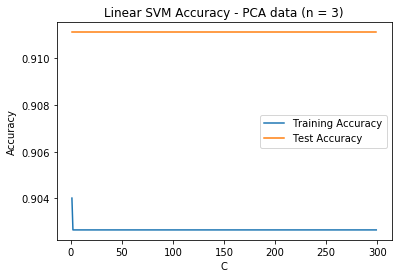

In [31]:
# Plotting Accuracy graph against hyperparameter C
# Note we get the best accuracy for C = 256

from sklearn import metrics

trainAcc = []
testAcc = []
C = []

for i in range (1, 300):
    clf = svm.SVC(C=i, kernel='linear', gamma = 'auto');
    clf.fit(X_train, y_train.ravel()); 
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    
    trainAcc.append(metrics.accuracy_score(y_train.ravel(), y_pred_train.ravel()))
    testAcc.append(metrics.accuracy_score(y_test.ravel(), y_pred_test.ravel()))
    C.append(i)

plt.plot(C, trainAcc, label = "Training Accuracy")
plt.plot(C, testAcc, label = "Test Accuracy")
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Linear SVM Accuracy - PCA data (n = 3)')
plt.legend()
plt.show()

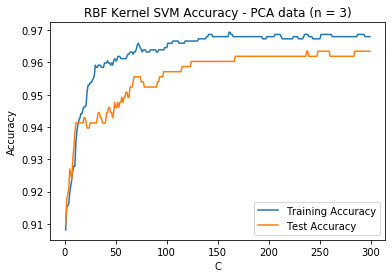

In [32]:
# Plotting Accuracy graph against hyperparameter C
# Note we get the best accuracy for C = 256

from sklearn import metrics

trainAcc = []
testAcc = []
C = []

for i in range (1, 300):
    clf = svm.SVC(C=i, kernel='rbf', gamma = 'auto');
    clf.fit(X_train, y_train.ravel()); 
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    
    trainAcc.append(metrics.accuracy_score(y_train.ravel(), y_pred_train.ravel()))
    testAcc.append(metrics.accuracy_score(y_test.ravel(), y_pred_test.ravel()))
    C.append(i)
    
plt.plot(C, trainAcc, label = "Training Accuracy")
plt.plot(C, testAcc, label = "Test Accuracy")
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('RBF Kernel SVM Accuracy - PCA data (n = 3)')
plt.legend()
plt.show()

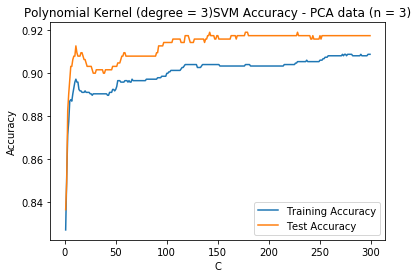

In [33]:
# Plotting Accuracy graph against hyperparameter C
# Note we get the best accuracy for C = 256

from sklearn import metrics

trainAcc = []
testAcc = []
C = []

for i in range (1, 300):
    clf = svm.SVC(C=i, kernel='poly', degree=3, gamma = 'auto');
    clf.fit(X_train, y_train.ravel()); 
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    
    trainAcc.append(metrics.accuracy_score(y_train.ravel(), y_pred_train.ravel()))
    testAcc.append(metrics.accuracy_score(y_test.ravel(), y_pred_test.ravel()))
    C.append(i)
    
plt.plot(C, trainAcc, label = "Training Accuracy")
plt.plot(C, testAcc, label = "Test Accuracy")
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Polynomial Kernel (degree = 3)SVM Accuracy - PCA data (n = 3)')
plt.legend()
plt.show()

In [24]:
# Perform PCA on the dataset to decrease the number of dimensions

# no of components = 2
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_scale)
X_pca = pca.transform(X_scale)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (2099, 13)
transformed shape: (2099, 2)


In [25]:
# Using the Train-Test Split Strategy on the PCA Data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=0)

# Generating models for SVM on PCA data
linear = svm.SVC(kernel='linear', gamma='auto', C=256)
rbf = svm.SVC(kernel='rbf', gamma='auto', C=256)
polynomial = svm.SVC(kernel='poly', degree=3, gamma='auto', C=256)

# Training models
lsvc = linear.fit(X_train, y_train.ravel())
rsvc = rbf.fit(X_train, y_train.ravel())
psvc = polynomial.fit(X_train, y_train.ravel())

In [26]:
#Accuracy of predicting by linear
lsvc_pre = lsvc.predict(X_train)
lsvc_accuracy = sum(lsvc_pre==y_train.ravel())/len(y_train.ravel())

#Accuracy of predicting by RBF
rsvc_pre = rsvc.predict(X_train)
rsvc_accuracy = sum(rsvc_pre==y_train.ravel())/len(y_train.ravel())

#Accuracy of predicting by polynomial with degree=3
psvc_pre = psvc.predict(X_train)
psvc_accuracy = sum(psvc_pre==y_train.ravel())/len(y_train.ravel())

print("Accuracy of predicting by linear: ", lsvc_accuracy)
print("Accuracy of predicting by RBF: ", rsvc_accuracy)
print("Accuracy of predicting by polynomial with degree=3: ", psvc_accuracy)

Accuracy of predicting by linear:  0.8815520762423418
Accuracy of predicting by RBF:  0.95643294758339
Accuracy of predicting by polynomial with degree=3:  0.852280462899932


In [27]:
#Accuracy of predicting by linear
lsvc_pre = lsvc.predict(X_test)
lsvc_accuracy = sum(lsvc_pre==y_test.ravel())/len(y_test.ravel())

#Accuracy of predicting by RBF
rsvc_pre = rsvc.predict(X_test)
rsvc_accuracy = sum(rsvc_pre==y_test.ravel())/len(y_test.ravel())

#Accuracy of predicting by polynomial with degree=3
psvc_pre = psvc.predict(X_test)
psvc_accuracy = sum(psvc_pre==y_test.ravel())/len(y_test.ravel())

print("Accuracy of predicting by linear: ", lsvc_accuracy)
print("Accuracy of predicting by RBF: ", rsvc_accuracy)
print("Accuracy of predicting by polynomial with degree=3: ", psvc_accuracy)

Accuracy of predicting by linear:  0.8825396825396825
Accuracy of predicting by RBF:  0.9587301587301588
Accuracy of predicting by polynomial with degree=3:  0.8650793650793651


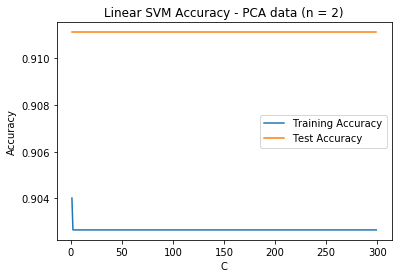

In [34]:
# Plotting Accuracy graph against hyperparameter C
# Note we get the best accuracy for C = 256

from sklearn import metrics

trainAcc = []
testAcc = []
C = []

for i in range (1, 300):
    clf = svm.SVC(C=i, kernel='linear', gamma = 'auto');
    clf.fit(X_train, y_train.ravel()); 
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    
    trainAcc.append(metrics.accuracy_score(y_train.ravel(), y_pred_train.ravel()))
    testAcc.append(metrics.accuracy_score(y_test.ravel(), y_pred_test.ravel()))
    C.append(i)

plt.plot(C, trainAcc, label = "Training Accuracy")
plt.plot(C, testAcc, label = "Test Accuracy")
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Linear SVM Accuracy - PCA data (n = 2)')
plt.legend()
plt.show()

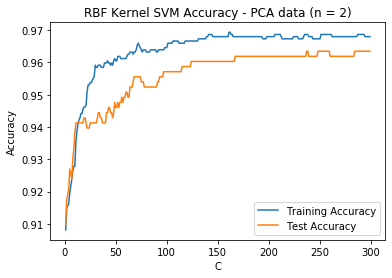

In [35]:
# Plotting Accuracy graph against hyperparameter C
# Note we get the best accuracy for C = 256

from sklearn import metrics

trainAcc = []
testAcc = []
C = []

for i in range (1, 300):
    clf = svm.SVC(C=i, kernel='rbf', gamma = 'auto');
    clf.fit(X_train, y_train.ravel()); 
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    
    trainAcc.append(metrics.accuracy_score(y_train.ravel(), y_pred_train.ravel()))
    testAcc.append(metrics.accuracy_score(y_test.ravel(), y_pred_test.ravel()))
    C.append(i)
    
plt.plot(C, trainAcc, label = "Training Accuracy")
plt.plot(C, testAcc, label = "Test Accuracy")
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('RBF Kernel SVM Accuracy - PCA data (n = 2)')
plt.legend()
plt.show()

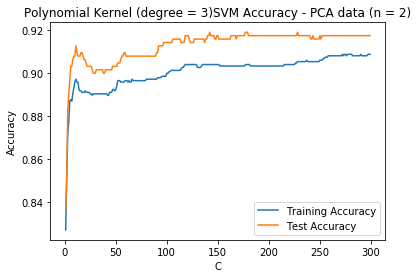

In [36]:
# Plotting Accuracy graph against hyperparameter C
# Note we get the best accuracy for C = 256

from sklearn import metrics

trainAcc = []
testAcc = []
C = []

for i in range (1, 300):
    clf = svm.SVC(C=i, kernel='poly', degree=3, gamma = 'auto');
    clf.fit(X_train, y_train.ravel()); 
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    
    trainAcc.append(metrics.accuracy_score(y_train.ravel(), y_pred_train.ravel()))
    testAcc.append(metrics.accuracy_score(y_test.ravel(), y_pred_test.ravel()))
    C.append(i)
    
plt.plot(C, trainAcc, label = "Training Accuracy")
plt.plot(C, testAcc, label = "Test Accuracy")
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Polynomial Kernel (degree = 3)SVM Accuracy - PCA data (n = 2)')
plt.legend()
plt.show()

Training Accuracy: 0.8815520762423418


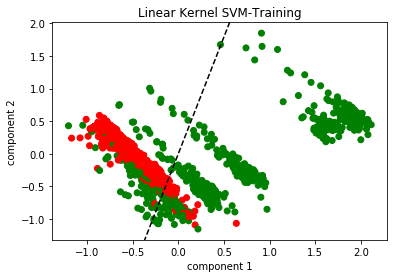

Testing Accuracy: 0.8825396825396825


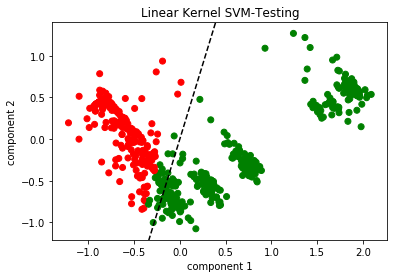

In [32]:
# Function to plot data to show SVM Classifier
def plot_linear_classifier(X, Y, w, b, graph_name):
    col = []
    for i in range(len(Y)):
        if Y[i] == 0:
            col.append('r')
        else:
            col.append('g')

    c1 = X[:, 0]
    c2 = X[:, 1]
    plt.scatter(c1, c2, c=col)
    plt.xlabel("component 1")
    plt.ylabel("component 2")
    plt.title(graph_name)
    ax = plt.gca()
    ax.autoscale(False)
    xx = np.array(ax.get_xlim())
    yy = -(xx * w[0][0] + b) / w[1][0]
    plt.plot(xx, yy, '--', c="black")
    plt.show()
    return

trn_graph_name = "Linear Kernel SVM" + "-Training"
print("Training Accuracy: " + str(metrics.accuracy_score(y_train, lsvc.predict(X_train))))
plot_linear_classifier(X_train, y_train, np.transpose(lsvc.coef_), 0, trn_graph_name)

tst_graph_name = "Linear Kernel SVM" + "-Testing"
print("Testing Accuracy: " + str(metrics.accuracy_score(y_test, lsvc.predict(X_test))))
#print(lsvc.predict(X_test))
plot_linear_classifier(X_test, lsvc.predict(X_test), np.transpose(lsvc.coef_), 0, tst_graph_name)